In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv(r'Herbals and preperations.csv', encoding='latin-1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
data=data.dropna(subset=['bot_name'])
data['bot_name'] = data['bot_name'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data = data.join(pd.get_dummies(data['author'].str.lower().str.strip(), prefix='Author'))
data['author'] = data['author'].dropna(axis=0).str.strip()
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
data=data.dropna(subset=['bot_name'])
data['bot_name'] = data['bot_name'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
def apply_fp(df):
  oht = df.groupby(['drug', 'bot_name']).size().unstack(fill_value=0)
  oht = oht.applymap(lambda x: 1 if x > 0 else 0)
  # Perform FP-Growth
  frequent_itemsets = fpgrowth(oht, min_support=0.1, use_colnames=True)
  return frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def max_itemsets(frequent_itemsets, count = 3, measure='support'):

  itemsets_drugs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == count)]
  itemsets_drugs = itemsets_drugs.sort_values(by='support', ascending=False)
  return itemsets_drugs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def get_association(frequent_itemsets):
  association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=5.0)
  return association_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def get_association_filter(frequent_itemsets):
    association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=5.0)
    # filtered_rules = association_rules_df[
    #     (association_rules_df['antecedents'].apply(len) == 2) &
    #     (association_rules_df['consequents'].apply(len) == 1)
    # ]
    return association_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,drug,author,herb_part,bot_name,disease_category,taste,potency,ultimate_taste,inherent_action,Author_agathiyar,Author_therayar
0,parangipattai choornam,agathiyar,NaN,smilax china,diabetes,sweet,cold,sweet,"udarthetri,megapinivilaki,kamamperuki,thuyimai...",1,0
1,parangipattai choornam,agathiyar,stem juice,saccharum officinarum,diabetes,sweet,cold,sweet,"ulalalatri,alugalatri,kulirchiyundaki,sirukali...",1,0
2,aavarai kiyalam,agathiyar,leaf,cassia auriculata,diabetes,astringent,cold,sweet,"thuvarpi,uramaki",1,0
3,aavarai kiyalam,agathiyar,NaN,kalamadham,diabetes,NaN,NaN,NaN,NaN,1,0
4,aavarai kiyalam,agathiyar,stem bark,cassis fistula,diabetes,"astringent , mildbitter",hot,spicy,NaN,1,0
5,aavarai kiyalam,agathiyar,seed,piper nigrum,diabetes,"bitter, pungent",hot,spicy,"karalundaki,agatuvaiagatri,muraiveppagatri,tha...",1,0
6,sukku kudineer,agathiyar,jaggery,borassus flabellifer,diabetes,"astringent, sweet",cold,sweet,"thuvarpi,aanmaiperuki",1,0
7,sukku kudineer,agathiyar,dried rhizome,zingiber officinale,diabetes,pungent,hot,spicy,"agatuvaiyagatri,pasitheethuntri,umilneerperuki...",1,0
8,sukku kudineer,agathiyar,root,gmelina asiatica,diabetes,"mildbitter, astringent",cold,sweet,"udarthetri,ullalaratri,manamutti",1,0
9,sirukurinjan kiyalam,agathiyar,root,gymnema sylvestre,diabetes,bitter,hot,spicy,"thuvarpi,pasitheethundi,uramaki,kulirchiyundaki",1,0


In [10]:
data.loc[data.bot_name.isin(['terminalia chebula', 'terminalia bellarica', 'phyllanthus emblica']), 'bot_name'] = 'triphala'
data.loc[data.bot_name.isin(['piper nigrum', 'piper longum', 'zingiber officinale']), 'bot_name'] = 'trikatu'
data.loc[(data.disease_category == 'diabetes') & (data.bot_name == 'saccharum officinarum'), 'bot_name'] = 'tinospora cordifolia'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data_dia = data.loc[data['disease_category'].apply(lambda x: x in ['diab/ tb ', 'diabetes'])].copy()
data_tub =  data.loc[data['disease_category'].apply(lambda x: x in ['diab/ tb ', 'tuberculosis '])].copy()
data_dia_aga = data_dia.loc[data_dia['author'].apply(lambda x: x in ['agathiyar'])]
data_dia_the = data_dia.loc[data_dia['author'].apply(lambda x: x in ['therayar'])]
data_tub_aga = data_tub.loc[data_tub['author'].apply(lambda x: x in ['agathiyar'])]
data_tub_the = data_tub.loc[data_tub['author'].apply(lambda x: x in ['therayar'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Diabetic data of agathiyar

In [12]:
frequent_itemset = apply_fp(data_dia_aga)
len(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


17

In [13]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
16,0.117647,"(syzygium aromaticum, elettaria cardamomum, ti..."


,support,itemsets


,support,itemsets


In [14]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(syzygium aromaticum),(elettaria cardamomum),0.147059,0.147059,0.147059,1.0,6.8,0.125433,inf,1.000000
1,(elettaria cardamomum),(syzygium aromaticum),0.147059,0.147059,0.147059,1.0,6.8,0.125433,inf,1.000000
2,"(syzygium aromaticum, tinospora cordifolia)",(elettaria cardamomum),0.117647,0.147059,0.117647,1.0,6.8,0.100346,inf,0.966667
3,"(elettaria cardamomum, tinospora cordifolia)",(syzygium aromaticum),0.117647,0.147059,0.117647,1.0,6.8,0.100346,inf,0.966667
4,(syzygium aromaticum),"(elettaria cardamomum, tinospora cordifolia)",0.147059,0.117647,0.117647,0.8,6.8,0.100346,4.411765,1.000000
5,(elettaria cardamomum),"(syzygium aromaticum, tinospora cordifolia)",0.147059,0.117647,0.117647,0.8,6.8,0.100346,4.411765,1.000000


In [58]:
data_name = "Diabetic-data-agathiyar"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Diabetic data of therayar

In [16]:
frequent_itemset = apply_fp(data_dia_the)
len(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


44

In [17]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
39,0.20,"(trikatu, terminalia bellirica, triphala)"
22,0.12,"(trikatu, costus speciosus, triphala)"
23,0.12,"(terminalia bellirica, costus speciosus, triph..."
24,0.12,"(trikatu, costus speciosus, terminalia bellirica)"
29,0.12,"(trikatu, costus speciosus, plectranthus vetti..."
32,0.12,"(trikatu, glycyrrhiza glabra, myristica fragrans)"
42,0.12,"(costus speciosus, cyperus rotundus, triphala)"


,support,itemsets
25,0.12,"(trikatu, costus speciosus, terminalia belliri..."


,support,itemsets


In [18]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(trikatu, triphala)","(terminalia bellirica, costus speciosus)",0.20,0.12,0.12,0.60,5.00,0.0960,2.20,1.000000
1,"(terminalia bellirica, costus speciosus)","(trikatu, triphala)",0.12,0.20,0.12,1.00,5.00,0.0960,inf,0.909091
2,"(trikatu, costus speciosus)",(plectranthus vettiveroides),0.20,0.12,0.12,0.60,5.00,0.0960,2.20,1.000000
3,(plectranthus vettiveroides),"(trikatu, costus speciosus)",0.12,0.20,0.12,1.00,5.00,0.0960,inf,0.909091
4,(glycyrrhiza glabra),(myristica fragrans),0.16,0.12,0.12,0.75,6.25,0.1008,3.52,1.000000
5,(myristica fragrans),(glycyrrhiza glabra),0.12,0.16,0.12,1.00,6.25,0.1008,inf,0.954545
6,"(trikatu, glycyrrhiza glabra)",(myristica fragrans),0.16,0.12,0.12,0.75,6.25,0.1008,3.52,1.000000
7,"(trikatu, myristica fragrans)",(glycyrrhiza glabra),0.12,0.16,0.12,1.00,6.25,0.1008,inf,0.954545
8,(glycyrrhiza glabra),"(trikatu, myristica fragrans)",0.16,0.12,0.12,0.75,6.25,0.1008,3.52,1.000000
9,(myristica fragrans),"(trikatu, glycyrrhiza glabra)",0.12,0.16,0.12,1.00,6.25,0.1008,inf,0.954545


In [62]:
data_name = "Diabetic-data-therayar"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tuberculosis data of agathiyar

In [20]:
frequent_itemset = apply_fp(data_tub_aga)
len(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


61

In [21]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
57,0.238095,"(trikatu, terminalia bellirica, triphala)"
24,0.190476,"(trikatu, carum copticum, triphala)"
32,0.190476,"(trikatu, alpinia galanga, triphala)"
18,0.142857,"(trikatu, solanum trilobatum, triphala)"
27,0.142857,"(saccharum officinarum, trikatu, triphala)"
33,0.142857,"(saccharum officinarum, trikatu, alpinia galanga)"
34,0.142857,"(saccharum officinarum, alpinia galanga, triph..."
36,0.142857,"(trikatu, alpinia galanga, solanum trilobatum)"
37,0.142857,"(alpinia galanga, solanum trilobatum, triphala)"
43,0.142857,"(alpinia galanga, solanum trilobatum, solanum ..."


,support,itemsets
35,0.142857,"(saccharum officinarum, trikatu, alpinia galan..."
38,0.142857,"(trikatu, alpinia galanga, solanum trilobatum,..."
49,0.142857,"(alpinia galanga, solanum trilobatum, solanum ..."
50,0.142857,"(trikatu, alpinia galanga, solanum trilobatum,..."
51,0.142857,"(trikatu, alpinia galanga, solanum surattense,..."
52,0.142857,"(trikatu, solanum trilobatum, solanum suratten..."


,support,itemsets
53,0.142857,"(solanum trilobatum, triphala, alpinia galanga..."


In [22]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(saccharum officinarum, trikatu)",(alpinia galanga),0.142857,0.190476,0.142857,1.00,5.25,0.115646,inf,0.944444
1,(alpinia galanga),"(saccharum officinarum, trikatu)",0.190476,0.142857,0.142857,0.75,5.25,0.115646,3.428571,1.000000
2,"(saccharum officinarum, triphala)",(alpinia galanga),0.142857,0.190476,0.142857,1.00,5.25,0.115646,inf,0.944444
3,(alpinia galanga),"(saccharum officinarum, triphala)",0.190476,0.142857,0.142857,0.75,5.25,0.115646,3.428571,1.000000
4,"(saccharum officinarum, trikatu, triphala)",(alpinia galanga),0.142857,0.190476,0.142857,1.00,5.25,0.115646,inf,0.944444
...,...,...,...,...,...,...,...,...,...,...
107,(solanum trilobatum),"(trikatu, alpinia galanga, solanum surattense,...",0.190476,0.142857,0.142857,0.75,5.25,0.115646,3.428571,1.000000
108,(alpinia galanga),"(trikatu, solanum trilobatum, solanum suratten...",0.190476,0.142857,0.142857,0.75,5.25,0.115646,3.428571,1.000000
109,(solanum surattense),"(trikatu, alpinia galanga, solanum trilobatum,...",0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.000000
110,(glycyrrhiza glabra),(syzygium aromaticum),0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.000000


In [63]:
data_name = "Tuberculosis-data-agathiyar"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tuberculosis data of therayar

In [24]:
frequent_itemset = apply_fp(data_tub_the)
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.384615,(costus speciosus)
1,0.384615,(trikatu)
2,0.307692,(abies spectabilis)
3,0.230769,(plectranthus vettiveroides)
4,0.230769,(cuminum cyminum)
...,...,...
1107,0.153846,"(glycyrrhiza glabra, carum copticum, mesua nag..."
1108,0.153846,"(costus speciosus, carum copticum, mesua nagas..."
1109,0.153846,"(glycyrrhiza glabra, costus speciosus, carum c..."
1110,0.153846,"(glycyrrhiza glabra, costus speciosus, carum c..."


In [25]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
103,0.230769,"(saccharum officinarum, abies spectabilis, cum..."
28,0.153846,"(trikatu, abies spectabilis, plectranthus vett..."
356,0.153846,"(nei, myristica fragrans, cuminum cyminum)"
358,0.153846,"(nei, abies spectabilis, myristica fragrans)"
359,0.153846,"(nei, trikatu, myristica fragrans)"
...,...,...
184,0.153846,"(syzygium aromaticum, cuminum cyminum, honey)"
185,0.153846,"(saccharum officinarum, syzygium aromaticum, c..."
186,0.153846,"(syzygium aromaticum, myristica fragrans, cumi..."
191,0.153846,"(syzygium aromaticum, cuminum cyminum, plectra..."


,support,itemsets
37,0.153846,"(trikatu, abies spectabilis, cuminum cyminum, ..."
662,0.153846,"(saccharum officinarum, syzygium aromaticum, m..."
636,0.153846,"(nei, syzygium aromaticum, honey, milk)"
637,0.153846,"(nei, syzygium aromaticum, cuminum cyminum, milk)"
638,0.153846,"(nei, syzygium aromaticum, milk, plectranthus ..."
...,...,...
321,0.153846,"(saccharum officinarum, abies spectabilis, cum..."
322,0.153846,"(saccharum officinarum, costus speciosus, cumi..."
323,0.153846,"(saccharum officinarum, costus speciosus, abie..."
324,0.153846,"(glycyrrhiza glabra, abies spectabilis, cuminu..."


,support,itemsets
60,0.153846,"(cuminum cyminum, honey, plectranthus vettiver..."
779,0.153846,"(milk, cuminum cyminum, honey, syzygium aromat..."
749,0.153846,"(milk, cuminum cyminum, saccharum officinarum,..."
750,0.153846,"(milk, cuminum cyminum, saccharum officinarum,..."
751,0.153846,"(milk, saccharum officinarum, plectranthus vet..."
...,...,...
455,0.153846,"(honey, syzygium aromaticum, plectranthus vett..."
456,0.153846,"(nei, honey, syzygium aromaticum, trikatu, abi..."
457,0.153846,"(cuminum cyminum, syzygium aromaticum, plectra..."
458,0.153846,"(cuminum cyminum, syzygium aromaticum, plectra..."


In [26]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(trikatu, abies spectabilis)","(cuminum cyminum, plectranthus vettiveroides)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
1,"(trikatu, cuminum cyminum)","(abies spectabilis, plectranthus vettiveroides)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
2,"(abies spectabilis, plectranthus vettiveroides)","(trikatu, cuminum cyminum)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
3,"(cuminum cyminum, plectranthus vettiveroides)","(trikatu, abies spectabilis)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
4,"(glycyrrhiza glabra, abies spectabilis)","(costus speciosus, cuminum cyminum)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
45905,"(glycyrrhiza glabra, mesua nagassarium)","(costus speciosus, carum copticum)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
45906,"(costus speciosus, carum copticum)","(glycyrrhiza glabra, mesua nagassarium)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
45907,"(costus speciosus, mesua nagassarium)","(glycyrrhiza glabra, carum copticum)",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0
45908,(carum copticum),"(glycyrrhiza glabra, costus speciosus, mesua n...",0.153846,0.153846,0.153846,1.0,6.5,0.130178,inf,1.0


In [65]:
data_name = "Tuberculosis-data-therayar"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Diabetes overall

In [28]:
frequent_itemset = apply_fp(data_dia)
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.310345,(trikatu)
1,0.103448,(cassia auriculata)
2,0.120690,(cuminum cyminum)
3,0.155172,(costus speciosus)
4,0.137931,(syzygium aromaticum)
5,0.137931,(glycyrrhiza glabra)
6,0.120690,(myristica fragrans)
7,0.103448,(milk)
8,0.120690,(hemidesmus indicus)
9,0.103448,(aloe barbadensis)


In [29]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
22,0.12069,"(trikatu, terminalia bellirica, triphala)"


,support,itemsets


,support,itemsets


In [30]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(trikatu, triphala)",(terminalia bellirica),0.137931,0.155172,0.120690,0.875000,5.638889,0.099287,6.758621,0.954286
1,(terminalia bellirica),"(trikatu, triphala)",0.155172,0.137931,0.120690,0.777778,5.638889,0.099287,3.879310,0.973761
2,(syzygium aromaticum),(elettaria cardamomum),0.137931,0.103448,0.103448,0.750000,7.250000,0.089180,3.586207,1.000000
3,(elettaria cardamomum),(syzygium aromaticum),0.103448,0.137931,0.103448,1.000000,7.250000,0.089180,inf,0.961538


In [66]:
data_name = "Diabetic-overall"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tuberculosis overall

In [32]:
frequent_itemset = apply_fp(data_dia)
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.310345,(trikatu)
1,0.103448,(cassia auriculata)
2,0.120690,(cuminum cyminum)
3,0.155172,(costus speciosus)
4,0.137931,(syzygium aromaticum)
5,0.137931,(glycyrrhiza glabra)
6,0.120690,(myristica fragrans)
7,0.103448,(milk)
8,0.120690,(hemidesmus indicus)
9,0.103448,(aloe barbadensis)


In [33]:
display(max_itemsets(frequent_itemset, 3, 'support'))
display(max_itemsets(frequent_itemset, 4, 'support'))
display(max_itemsets(frequent_itemset, 5, 'support'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
22,0.12069,"(trikatu, terminalia bellirica, triphala)"


,support,itemsets


,support,itemsets


In [34]:
get_association(frequent_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(trikatu, triphala)",(terminalia bellirica),0.137931,0.155172,0.120690,0.875000,5.638889,0.099287,6.758621,0.954286
1,(terminalia bellirica),"(trikatu, triphala)",0.155172,0.137931,0.120690,0.777778,5.638889,0.099287,3.879310,0.973761
2,(syzygium aromaticum),(elettaria cardamomum),0.137931,0.103448,0.103448,0.750000,7.250000,0.089180,3.586207,1.000000
3,(elettaria cardamomum),(syzygium aromaticum),0.103448,0.137931,0.103448,1.000000,7.250000,0.089180,inf,0.961538


In [67]:
data_name = "Tuberculosis-overall"
frequent_itemset.to_csv(f"frequent-itemsets-{data_name}.csv")
max_itemsets(frequent_itemset, 3, 'support').to_csv(f"group-count-3-{data_name}.csv")
max_itemsets(frequent_itemset, 4, 'support').to_csv(f"group-count-4-{data_name}.csv")
max_itemsets(frequent_itemset, 5, 'support').to_csv(f"group-count-5-{data_name}.csv")
get_association(frequent_itemset).to_csv(f"association-{data_name}.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Graph

In [40]:
def plot_itemset_frequency(df, data_name=""):
    frequent_itemsets = apply_fp(df).sort_values(by = ['support'], ascending=False).head(30)
    plt.figure(figsize=(12, 6))
    plt.bar(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)).astype(str), frequent_itemsets['support'], color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.title(f'{data_name}: Frequent Itemsets and Their Support (top 30 by support)')
    plt.savefig(f'{data_name}: Frequent Itemsets and Their Support (top 30 by support).png', bbox_inches='tight')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(df, data_name=''):
    data = apply_fp(df)
    # Concatenate itemsets based on support
    itemsets = []
    for index, row in data.iterrows():
        itemset = ', '.join([str(item) for item in list(row['itemsets'])])
        for _ in range(int(row['support'] * 100)):  # Multiply by 100 for more prominent words
            itemsets.append(itemset)

    itemsets_text = ' '.join(itemsets)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(itemsets_text)

    plt.figure(dpi=600)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{data_name}: Word Cloud of Itemsets.png')
    plt.savefig(f'{data_name}: Word Cloud of Itemsets.png')

# Usage
# Pass your DataFrame with itemsets and support


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
def plot_hexbin_support_confidence(df, data_name=""):
    frequent_itemsets = apply_fp(df)
    association_rules_df = get_association(frequent_itemsets)
    plt.figure(figsize=(10, 6))
    plt.hexbin(association_rules_df['support'], association_rules_df['confidence'], gridsize=20, cmap='YlGnBu', bins='log')
    plt.colorbar()
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title(f'{data_name}: Hexbin Plot of Association Rules')
    plt.savefig(f'{data_name}: Hexbin Plot of Association Rules')
# plot_hexbin_support_confidence(data_tub)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(df, data_name=""):
    frequent_itemsets = apply_fp(df)
    association_rules_df = get_association(frequent_itemsets)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(association_rules_df['support'], association_rules_df['confidence'], association_rules_df['lift'], c=association_rules_df['lift'], cmap='viridis')
    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')
    ax.set_title(f'{data_name}: 3D Scatter Plot of Support, Confidence, and Lift')
    plt.savefig(f'{data_name}:  3D Scatter Plot of Support, Confidence, and Lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_network_graph(df, data_name=''):
    frequent_itemsets = apply_fp(df)
    association_rules_df = get_association(frequent_itemsets).sort_values(by = ['support'], ascending=False).head(30)
    G = nx.Graph()

    for index, row in association_rules_df.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        lift = row['lift']

        G.add_node(antecedents)
        G.add_node(consequents)
        G.add_edge(antecedents, consequents, weight=lift)

    edge_weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    edge_colors = [d['weight'] for (u, v, d) in G.edges(data=True)]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    pos = nx.spring_layout(G, dim=3)

    nodes = G.nodes()

    for node in nodes:
        (x, y, z) = pos[node]
        ax.text(x, y, z, s=node, fontsize=8)

    for (u, v, d) in G.edges(data=True):
        x, y, z = pos[u]
        x2, y2, z2 = pos[v]
        ax.plot([x, x2], [y, y2], [z, z2], 'k-', c=plt.cm.viridis(d['weight']))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(f'{data_name}:  3D Association Rules Network Graph')
    plt.savefig(f'{data_name}:  3D Association Rules Network Graph.png')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
def plot_all(df, data_name):
  # plot_itemset_frequency(df, data_name)
  # plot_word_cloud(df, data_name)
  # plot_hexbin_support_confidence(df, data_name)
  # plot_3d_scatter(df, data_name)
  plot_3d_network_graph(df, data_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
<ipython-input-44-a304ed0bb0ec>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x, x2], [y, y2], [z, z2], 'k-', c=plt.cm.viridis(d['weight']))
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: Deprecation

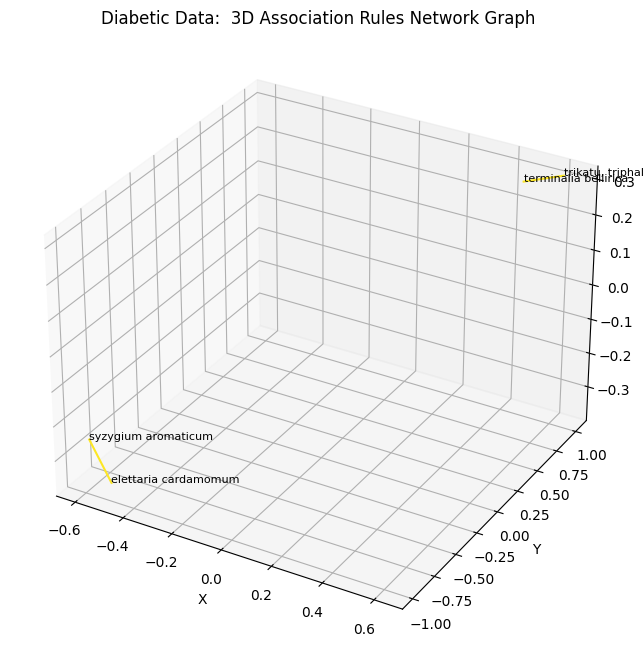

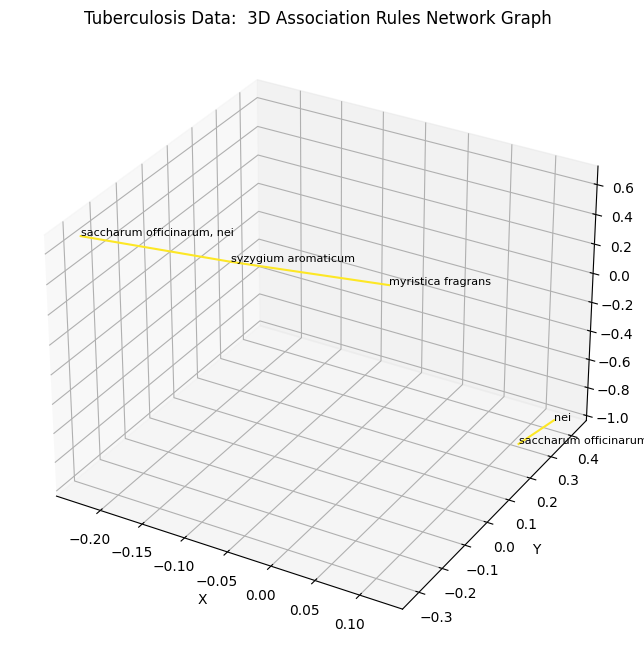

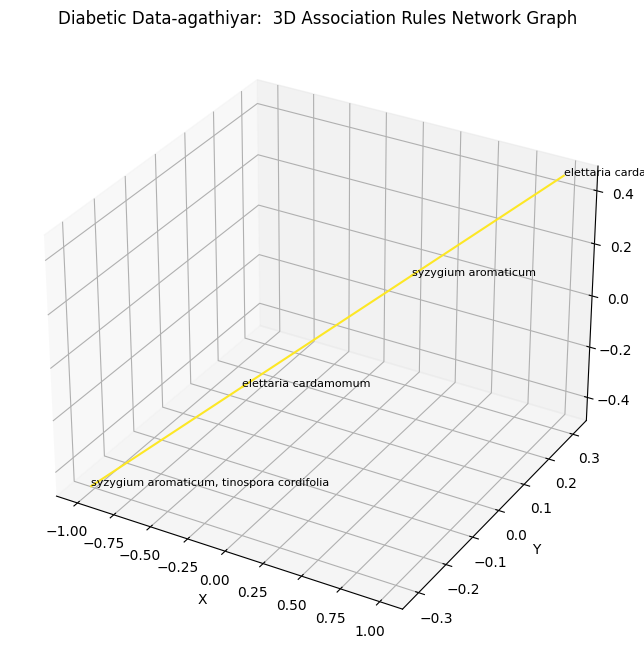

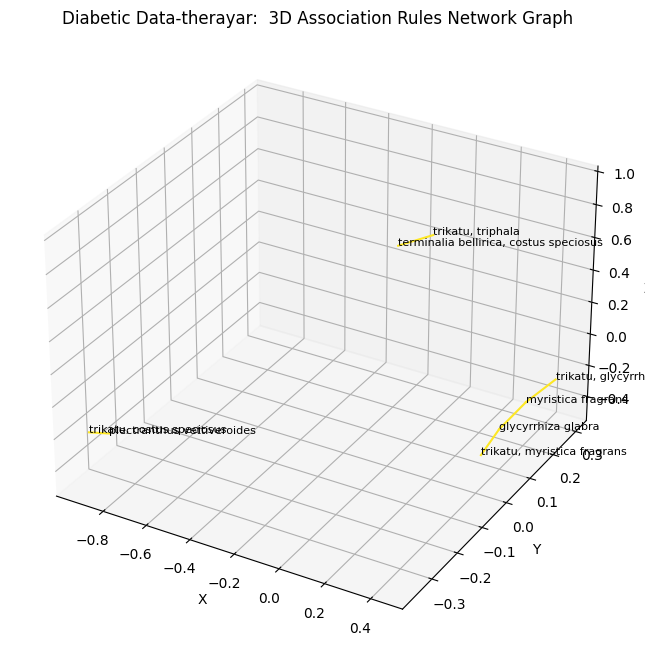

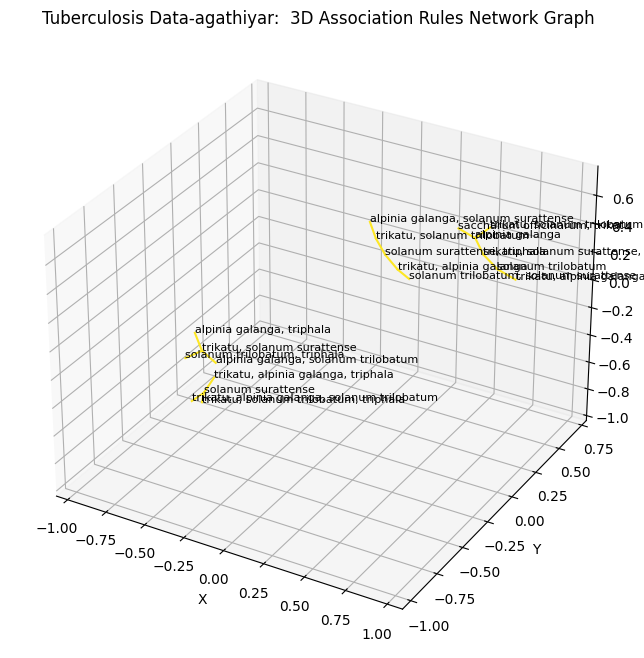

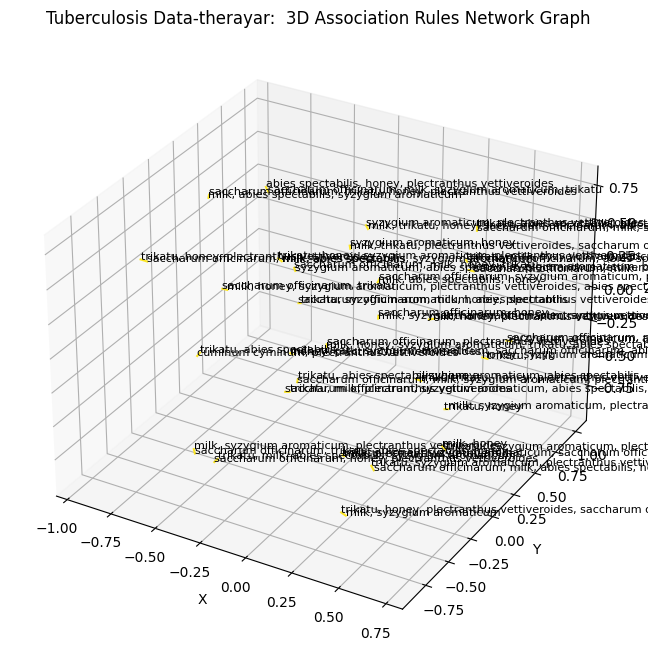

In [54]:
plot_all(data_dia, "Diabetic Data")
plot_all(data_tub, "Tuberculosis Data")
plot_all(data_dia_aga, "Diabetic Data-agathiyar")
plot_all(data_dia_the, "Diabetic Data-therayar")
plot_all(data_tub_aga, "Tuberculosis Data-agathiyar")
plot_all(data_tub_the, "Tuberculosis Data-therayar")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


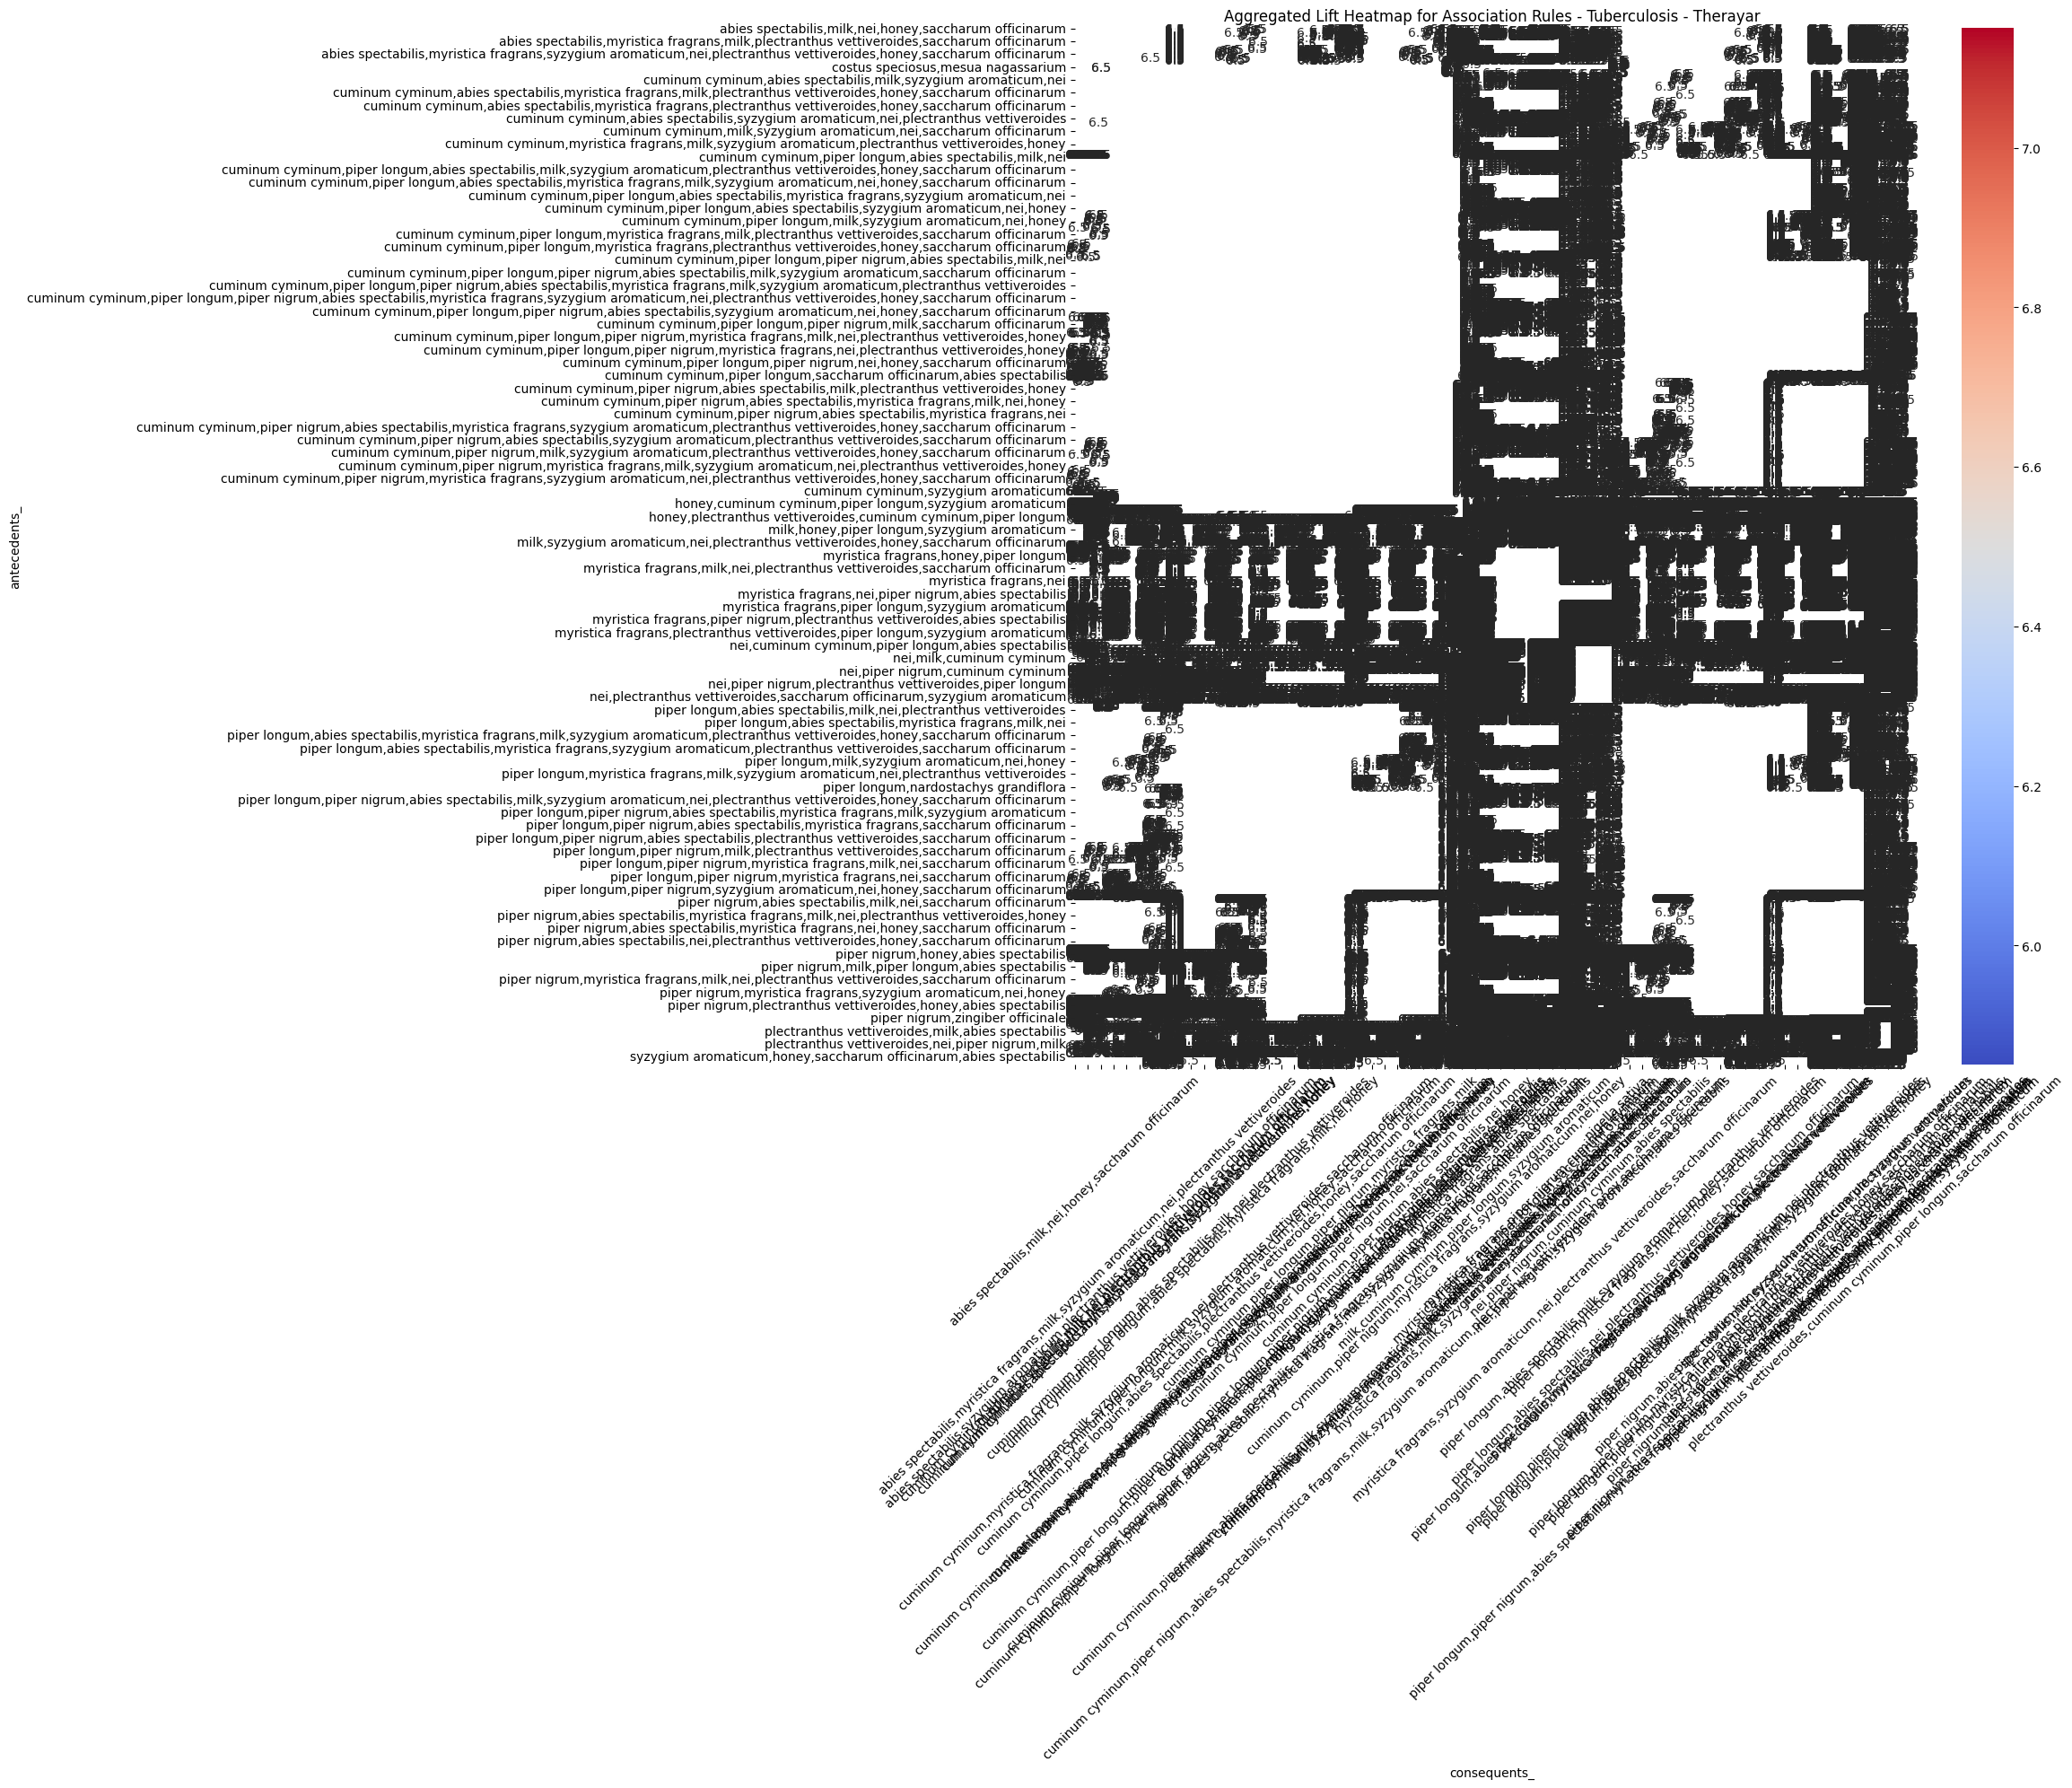

In [ ]:
import seaborn as sns
def plot_heatmap(df, data_name):
    frequent_itemsets = apply_fp(df)
    apriori_rules = get_association(frequent_itemsets)
    apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
    apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
    apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
    apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
    pivot = apriori_rules[apriori_rules['lhs_items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
    plt.figure(figsize=(15,15))

    sns.heatmap(pivot, annot=True, cmap='coolwarm')
    # sns.heatmap(pivot, annot = True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.title(f'Aggregated Lift Heatmap for Association Rules - {data_name}')
    plt.show()
    # plt.savefig(f'Aggregated Lift Heatmap for Association Rules - {data_name}.png', bbox_inches='tight')

# plot_heatmap(data_tub_aga, "Diabeties - Tuberculosis [2 -> 1]")
plot_heatmap(data_tub_the, "Tuberculosis - Therayar")

In [69]:
import time
from google.colab import files
import os

# Set the directory where your CSV files are located
directory = "/content/"

# List all files in the specified directory
fs = os.listdir(directory)
print(len(fs))
# Filter and download only the CSV files
for f in fs:
    if f.endswith(".csv"):
        files.download(directory + f)

18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>